In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sim.oscillators import Oscillator

In [3]:
%matplotlib inline

In [6]:
class Oscillator(object):
    amp = [10.0, 1.0, 0.5, 0.1]
    frq = [np.pi * 1.0, np.pi * 2.0, np.pi * 3.0, np.pi * 4.0]
    nos = [0.4, 0.1, 0.05, 0.01]
    drop_prob = 0.05

    def __init__(self, span=0.5, spacing=0.01,
                 add_noise=False, drops=False):
        self.t = 0
        self.nsteps = int(span / spacing)
        self.spacing = spacing
        self.add_noise = add_noise
        self.drops = drops
        self.times = []
        self.d1, self.d2, self.d3, self.d4 = [], [], [], []
        self.dt, self.dT = [], []
        for i in range(self.nsteps):
            self._add_data_point()
            self.t = self.t + self.spacing

    def _add_data_point(self):
        if len(self.times) >= self.nsteps:
            for a in [self.times, self.d1, self.d2, self.d3, self.d4,
                      self.dt, self.dT]:
                a.pop(0)
        self.times.append(self.t)
        for i, a in enumerate([self.d1, self.d2, self.d3, self.d4]):
            v = 0.0
            if not (self.drops and np.random.random() < Oscillator.drop_prob):
                v = Oscillator.amp[i] * np.cos(Oscillator.frq[i] * self.t) \
                    + Oscillator.nos[i] * np.random.randn() \
                    if self.add_noise else 0.0
            a.append(v)
        self.dt.append(self.d1[-1] + self.d2[-1])
        self.dT.append(self.dt[-1] + self.d3[-1] + self.d3[-1])

    def step(self):
        self._add_data_point()
        self.t = self.t + self.spacing

    def ts(self):
        return np.asarray(self.times)

    def dts(self):
        return np.asarray(self.dt)

    def dTs(self):
        return np.asarray(self.dT)


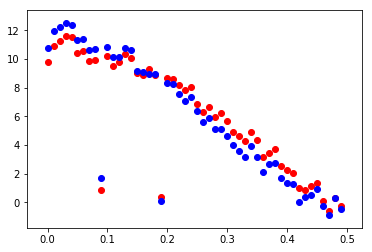

In [7]:
osc = Oscillator(add_noise=True, drops=True)
plt.scatter(osc.ts(), osc.dts(), c='r')
plt.scatter(osc.ts(), osc.dTs(), c='b')
plt.show()

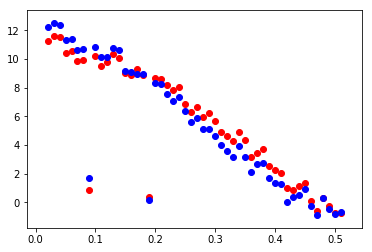

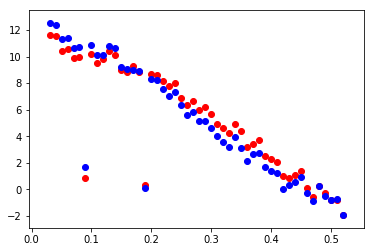

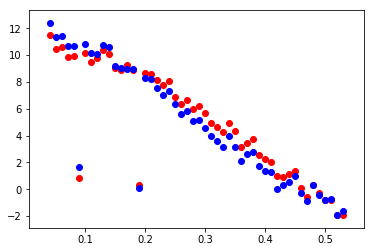

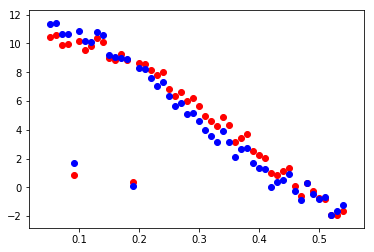

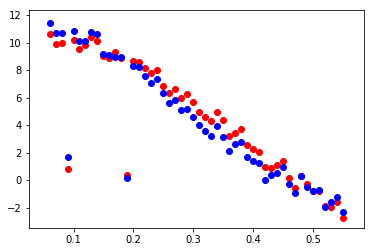

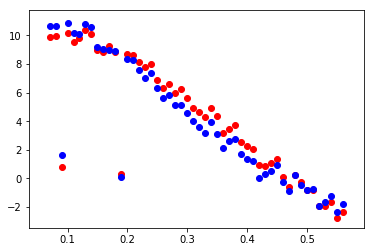

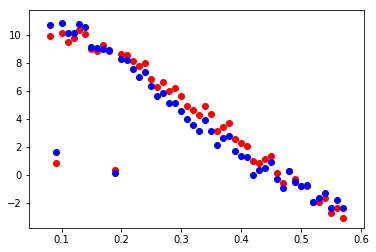

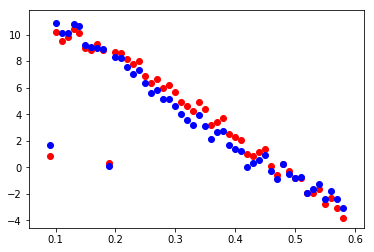

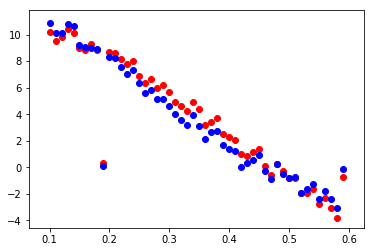

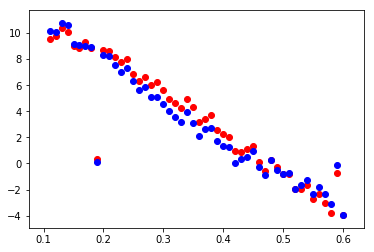

In [9]:
for _ in range(10):
    osc.step()
    plt.scatter(osc.ts(), osc.dts(), c='r')
    plt.scatter(osc.ts(), osc.dTs(), c='b')
    plt.show()

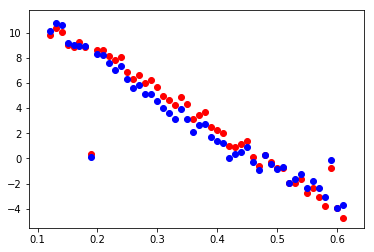

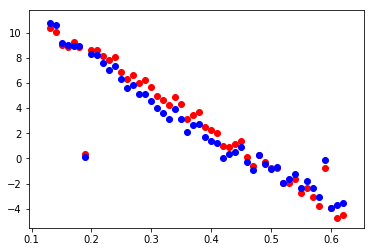

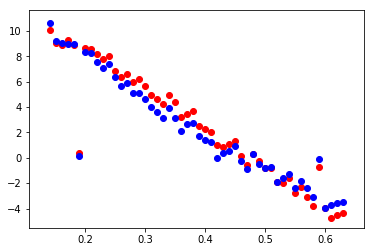

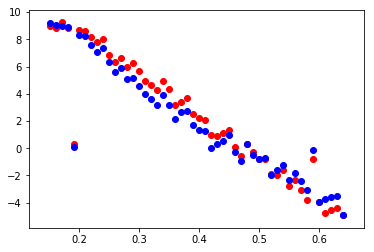

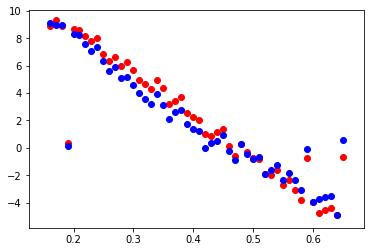

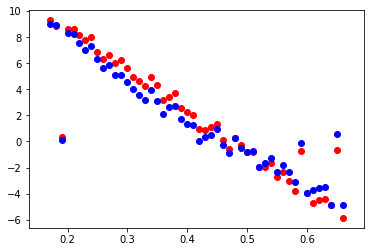

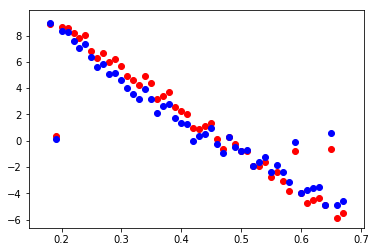

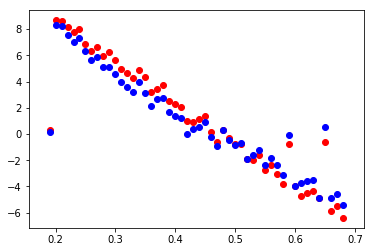

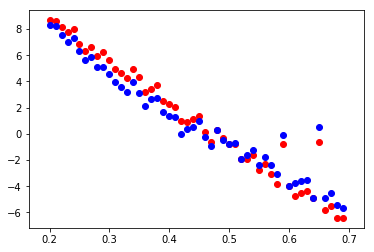

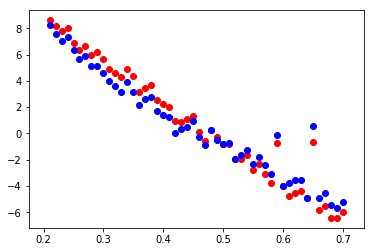

In [10]:
for _ in range(10):
    osc.step()
    plt.scatter(osc.ts(), osc.dts(), c='r')
    plt.scatter(osc.ts(), osc.dTs(), c='b')
    plt.show()